#1 Definindo as funções de densidade DENSIDADES NORMAIS (X, Y, Z)

In [62]:
X <- function(x) dnorm(x, mean = 90, sd = sqrt(100))   # sd = 10
Y <- function(x) dnorm(x, mean = 90, sd = sqrt(80))    # sd ≈ 8.944
Z <- function(x) dnorm(x, mean = 85, sd = sqrt(100))   # sd = 10

2
Valores numéricos da densidade


In [63]:
X(90)   # densidade da X no ponto 90
Y(90)   # densidade da Y no ponto 90
Z(85)   # densidade da Z no ponto 85

[1] 0.03989423

[1] 0.0446031

[1] 0.03989423

# 2) Sobrepor Y ~ N(90, 80) e Z ~ N(85, 100) ao gráfico anterior


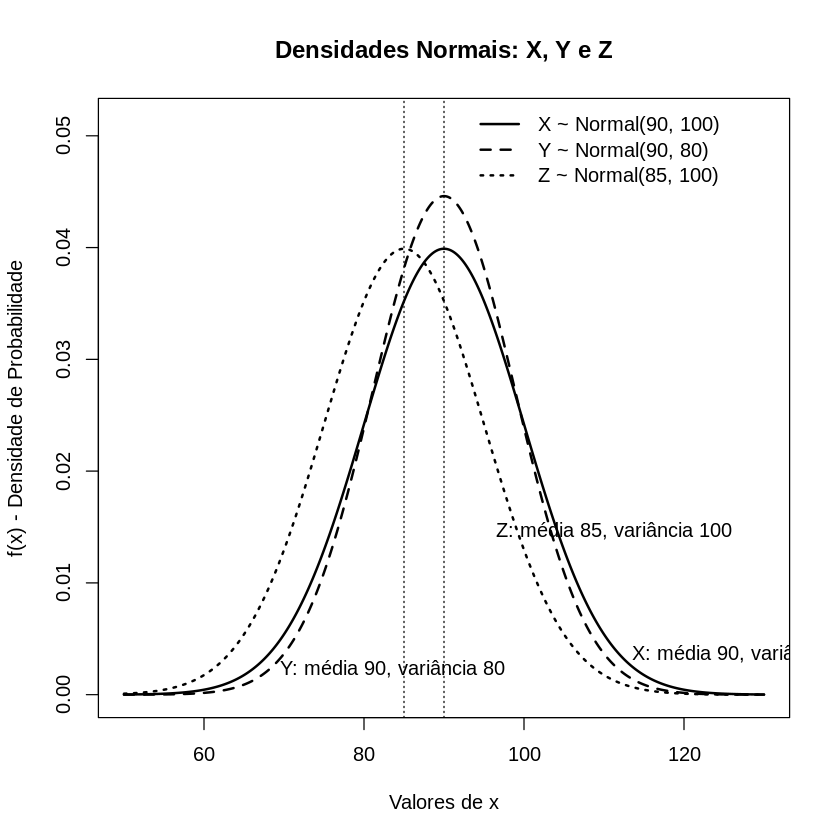

In [64]:
# Grade de x para o gráfico
x_norm <- seq(50, 130, by = 0.1)

# Gráfico base com X
plot(x_norm, X(x_norm), type = "l", lwd = 2,
     main = "Densidades Normais: X, Y e Z",
     xlab = "Valores de x", ylab = "f(x) - Densidade de Probabilidade",
     ylim = c(0, max(Y(90)) * 1.15))

     # Sobreposições: Y e Z
lines(x_norm, Y(x_norm), lwd = 2, lty = 2)
lines(x_norm, Z(x_norm), lwd = 2, lty = 3)


# Legenda em português
legend("topright",
       legend = c("X ~ Normal(90, 100)",
                  "Y ~ Normal(90, 80)",
                  "Z ~ Normal(85, 100)"),
       lty = c(1, 2, 3), lwd = 2, bty = "n")



text(112, X(112), "X: média 90, variância 100", pos = 4)
text(68,  Y(68),  "Y: média 90, variância 80",  pos = 4)
text(95,  Z(95) * 0.6, "Z: média 85, variância 100", pos = 4)


abline(v = 90, lty = 3)
abline(v = 85, lty = 3)

# PASSO 3 — DENSIDADES QUI-QUADRADO (χ²) com 1, 2 e 5 g.l.

In [65]:
qui1 <-function(x) dchisq(x, df=1)
qui2 <-function(x) dchisq(x, df=2)
qui3 <-function(x) dchisq(x, df=5)


#exemplos numericos
cat("χ²(1 gl) em x=1:", qui1(1), "\n")
cat("χ²(2 gl) em x=1:", qui1(1), "\n")
cat("χ²(5 gl) em x=1:", qui1(1), "\n")

χ²(1 gl) em x=1: 0.2419707 
χ²(2 gl) em x=1: 0.2419707 
χ²(5 gl) em x=1: 0.2419707 


#grafico de x para cada X²


In [66]:
x_chi <- seq(0, 20, by = 0.1)


# Gráfico base com df = 1

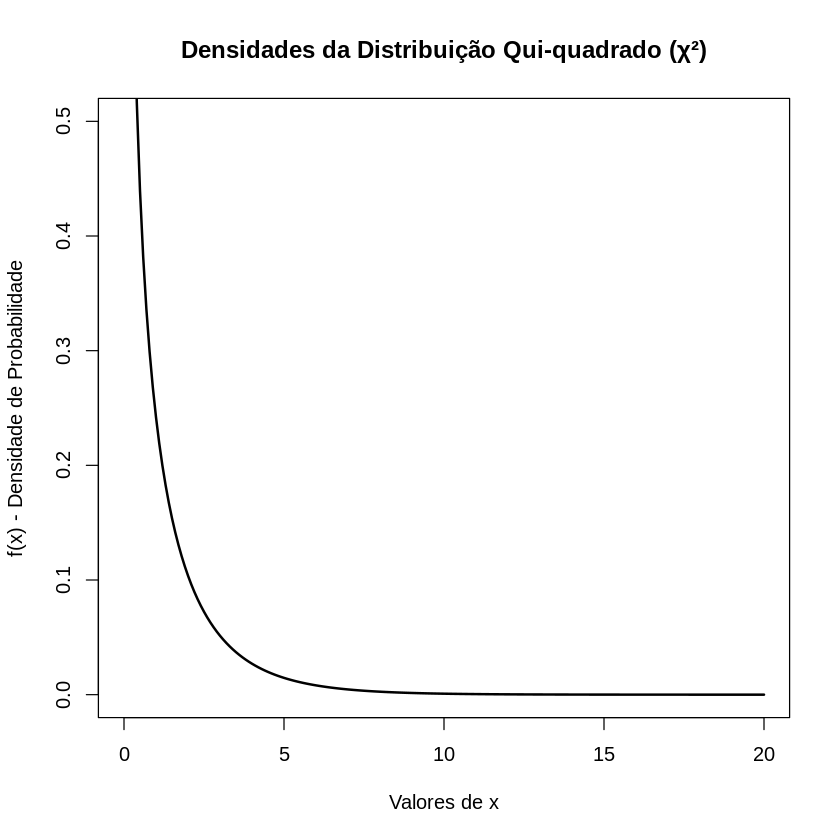

In [67]:
plot(x_chi, qui1(x_chi), type = "l", lwd = 2,
     main = "Densidades da Distribuição Qui-quadrado (χ²)",
     xlab = "Valores de x", ylab = "f(x) - Densidade de Probabilidade",
     ylim = c(0, 0.5))

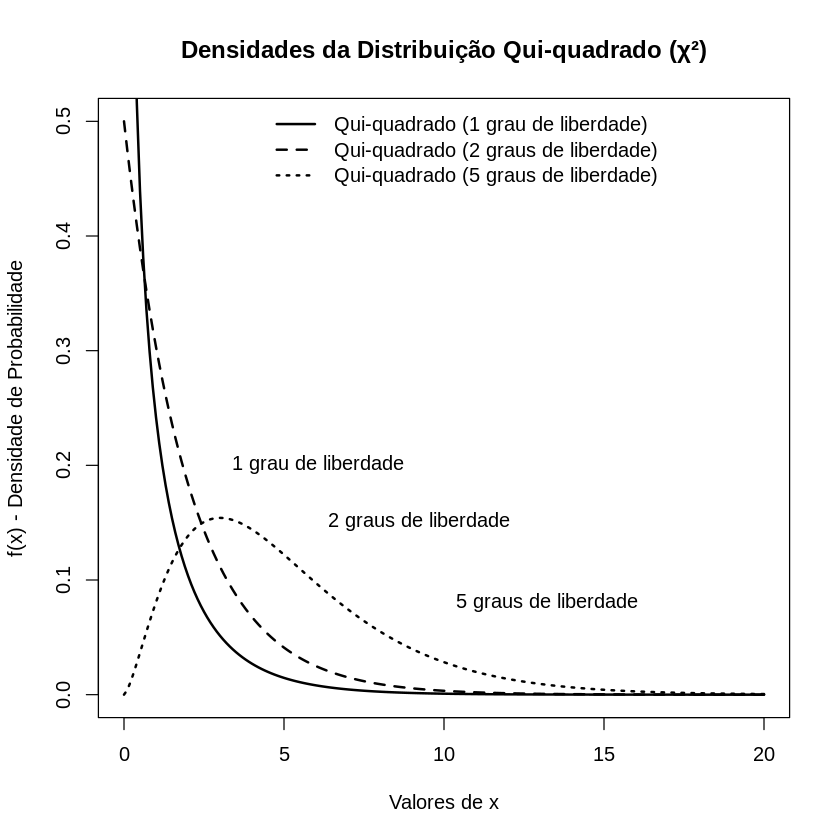

In [68]:
# Gráfico base com df = 1
plot(x_chi, qui1(x_chi), type = "l", lwd = 2,
     main = "Densidades da Distribuição Qui-quadrado (χ²)",
     xlab = "Valores de x", ylab = "f(x) - Densidade de Probabilidade",
     ylim = c(0, 0.5))

# Sobreposições df = 2 e df = 5
lines(x_chi, qui2(x_chi), lwd = 2, lty = 2)
lines(x_chi, qui3(x_chi), lwd = 2, lty = 3)

# Legenda em português
legend("topright",
       legend = c("Qui-quadrado (1 grau de liberdade)",
                  "Qui-quadrado (2 graus de liberdade)",
                  "Qui-quadrado (5 graus de liberdade)"),
       lty = c(1, 2, 3), lwd = 2, bty = "n")

# Rótulos bem posicionados (sem sobrepor)
text(3,  0.20, "1 grau de liberdade", pos = 4)
text(6,  0.15, "2 graus de liberdade", pos = 4)
text(10, 0.08, "5 graus de liberdade", pos = 4)

#Passo 5: Experimento 2
Distribuição amostral da média – Teorema do Limite Central

## 1.variável X que segue distribuição exponencial,

In [69]:
#parametros para população
mu_pop <- 10           # média populacional da variável X
n <- 30                # tamanho de cada amostra
n_sim <- 1000          # número total de amostras simuladas

#simulção
set.seed(123) #reprotutividade
medias <- replicate(n_sim, mean(rexp(n, rate = 1/mu_pop)))

###analise dos resultados

In [70]:
# Média e desvio padrão das médias amostrais
cat("Média das médias:", mean(medias), "\n")
cat("Desvio das médias:", sd(medias), "\n")


Média das médias: 10.02618 
Desvio das médias: 1.801532 


###Gráfico: distribuição das médias amostrais

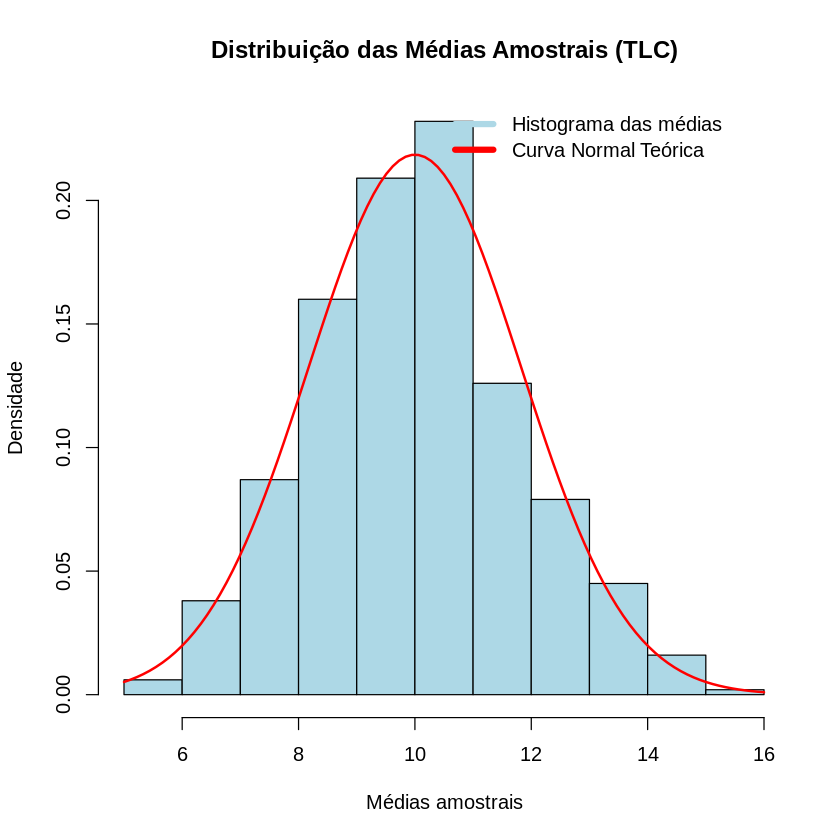

In [71]:
hist(medias, probability = TRUE, col = "lightblue",
     main = "Distribuição das Médias Amostrais (TLC)",
     xlab = "Médias amostrais", ylab = "Densidade")

# Curva normal teórica sobreposta
curve(dnorm(x, mean = mu_pop, sd = (mu_pop/sqrt(n))),
      col = "red", lwd = 2, add = TRUE)

legend("topright", legend = c("Histograma das médias", "Curva Normal Teórica"),
       col = c("lightblue", "red"), lwd = c(5, 5), bty = "n")

Ao simular várias amostras de uma variável
𝑋
X assimétrica (Exponencial),
observamos que as médias amostrais seguem aproximadamente uma distribuição normal,
com média próxima de
𝜇
μ e desvio padrão
𝜎
/
𝑛
σ/
n
	​

,
conforme previsto pelo Teorema do Limite Central.


## 2.Calcule a média amostral para cada amostra

In [72]:
medias_amostrais <- replicate(n_sim, mean(rexp(n, rate = 1/mu_pop)))
# replicate() repete a operação mean(rexp(...)) mil vezes

In [73]:
head(medias_amostrais)
#Mostrar algumas médias amostrais calculadas mostra as 6 primeiras médias

[1] 10.910072 10.044071 11.207204  8.800258 11.983843  8.725098

In [74]:
#Calcular estatísticas descritivas dessas médias
cat("Média das médias amostrais:", mean(medias_amostrais), "\n")
cat("Desvio-padrão das médias:", sd(medias_amostrais), "\n")

Média das médias amostrais: 9.959532 
Desvio-padrão das médias: 1.785249 


##3 . Faça um histograma dos valores das médias amostrais

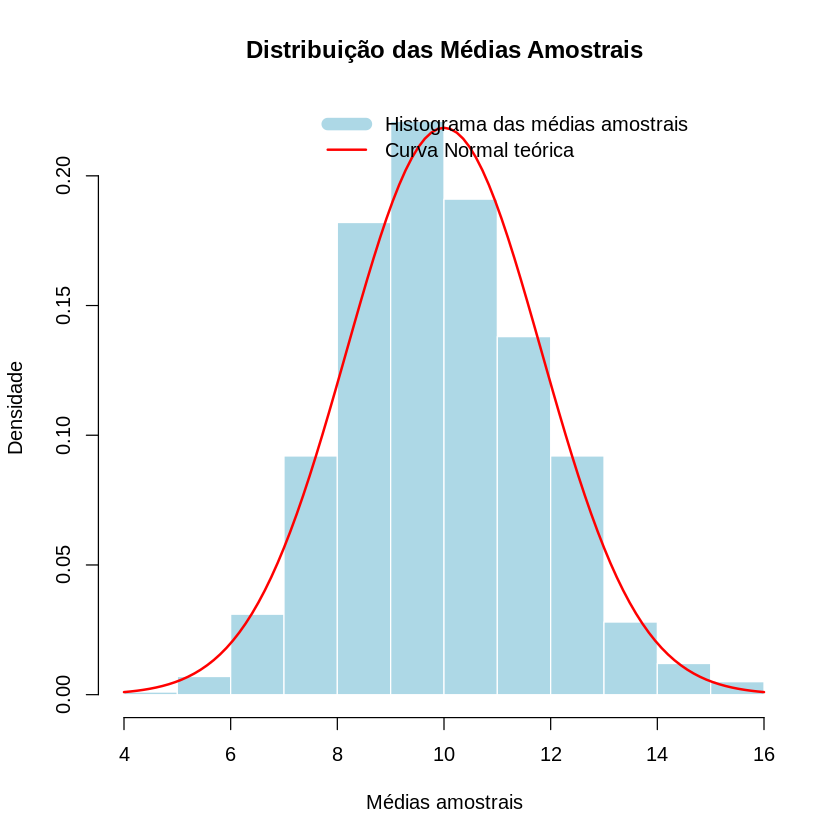

In [75]:
hist(medias_amostrais,
     probability = TRUE,         # eixo y mostra densidade (não contagem)
     col = "lightblue",          # cor de preenchimento
     border = "white",           # sem contorno forte
     main = "Distribuição das Médias Amostrais",
     xlab = "Médias amostrais",
     ylab = "Densidade")

# ----------------------------------------------------------
# 2. Sobrepor curva normal teórica (esperada pelo TLC)
# ----------------------------------------------------------
curve(dnorm(x,
            mean = mu_pop,           # mesma média da população
            sd = mu_pop / sqrt(n)),  # desvio da média amostral
      col = "red", lwd = 2, add = TRUE)

# ----------------------------------------------------------
# 3. Adicionar legenda em português
# ----------------------------------------------------------
legend("topright",
       legend = c("Histograma das médias amostrais",
                  "Curva Normal teórica"),
       col = c("lightblue", "red"),
       lwd = c(10, 2),
       bty = "n")

## 4.Examine os dados de forma gráfica

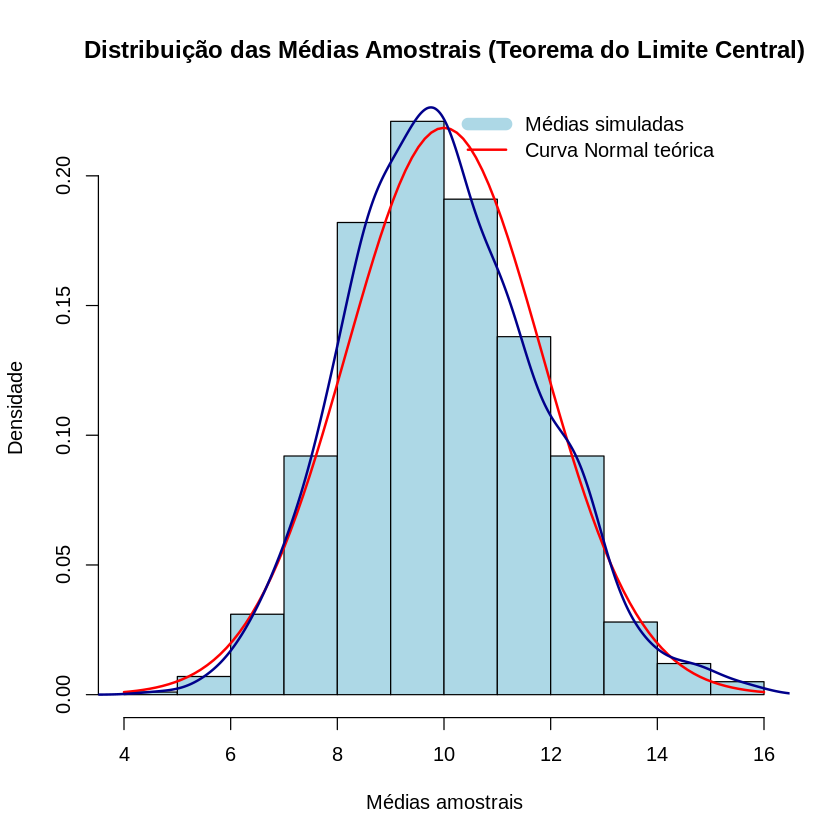

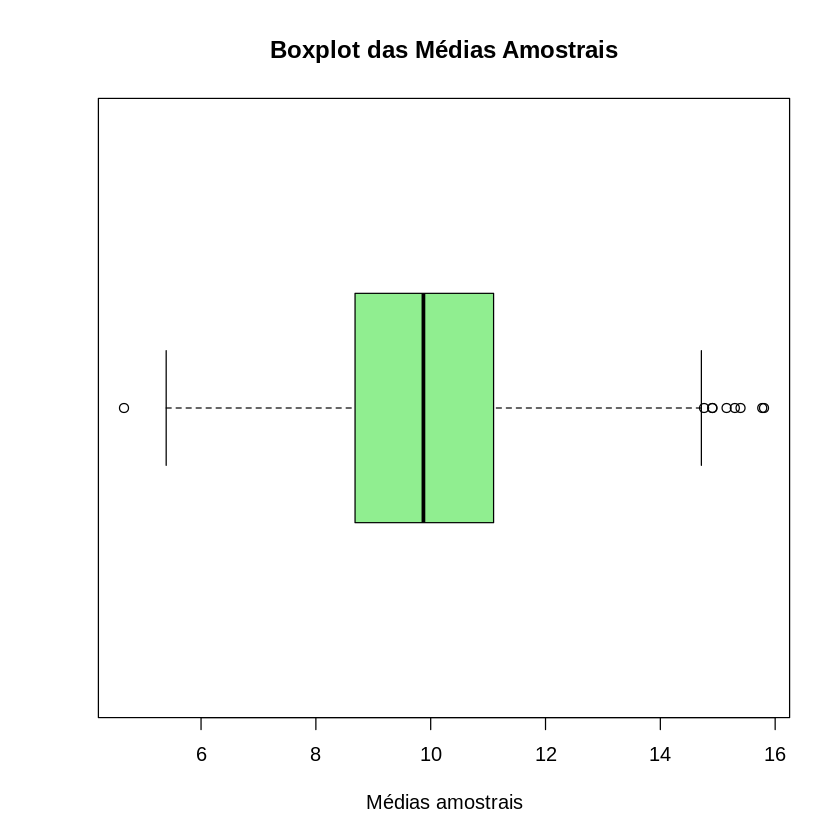

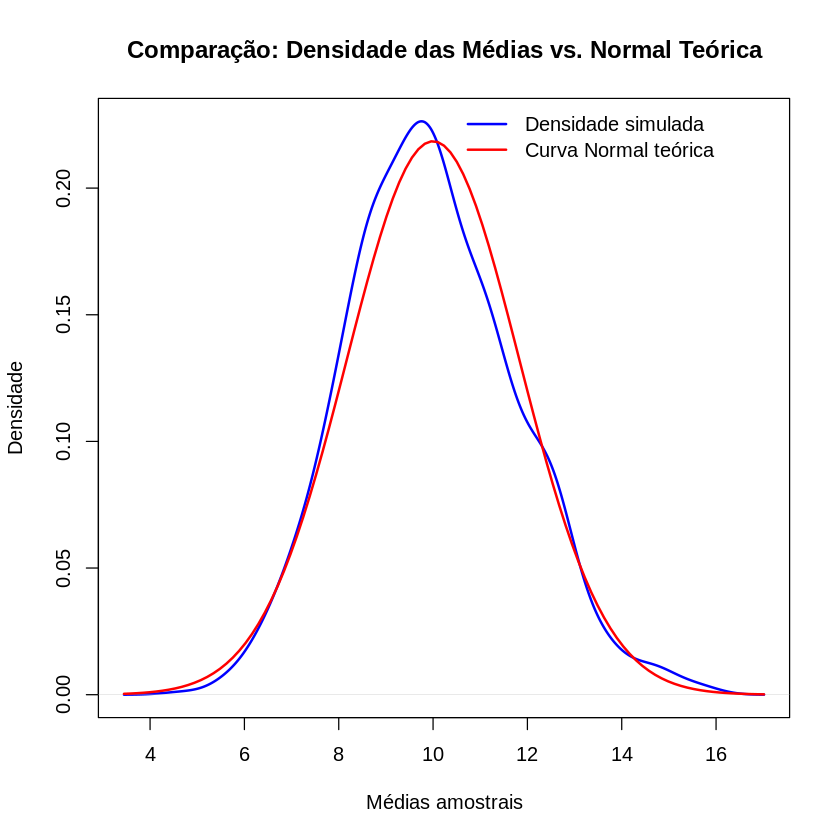

In [76]:
# 1. Histograma com curva normal teórica (já conhecido)
hist(medias_amostrais, probability = TRUE, col = "lightblue",
     main = "Distribuição das Médias Amostrais (Teorema do Limite Central)",
     xlab = "Médias amostrais", ylab = "Densidade")

curve(dnorm(x, mean = mu_pop, sd = mu_pop / sqrt(n)),
      col = "red", lwd = 2, add = TRUE)

legend("topright",
       legend = c("Médias simuladas", "Curva Normal teórica"),
       col = c("lightblue", "red"), lwd = c(10, 2), bty = "n")

# 2. Densidade suavizada (curva empírica)
lines(density(medias_amostrais), col = "darkblue", lwd = 2)

# Essa linha mostra a forma real (empírica) das médias simuladas,
# que deve se aproximar muito da curva Normal teórica.

# 3. Boxplot das médias amostrais
boxplot(medias_amostrais, horizontal = TRUE, col = "lightgreen",
        main = "Boxplot das Médias Amostrais",
        xlab = "Médias amostrais")

# O boxplot permite visualizar a dispersão e a simetria da distribuição
# (espera-se algo bem simétrico, confirmando a aproximação normal)

# 4. Gráfico de densidade comparativo (simulada vs. normal)
plot(density(medias_amostrais), col = "blue", lwd = 2,
     main = "Comparação: Densidade das Médias vs. Normal Teórica",
     xlab = "Médias amostrais", ylab = "Densidade")

curve(dnorm(x, mean = mu_pop, sd = mu_pop / sqrt(n)),
      col = "red", lwd = 2, add = TRUE)

legend("topright",
       legend = c("Densidade simulada", "Curva Normal teórica"),
       col = c("blue", "red"), lwd = 2, bty = "n")


## 5.Verifique se os dados seguem o padrão de uma distribuição Normal.

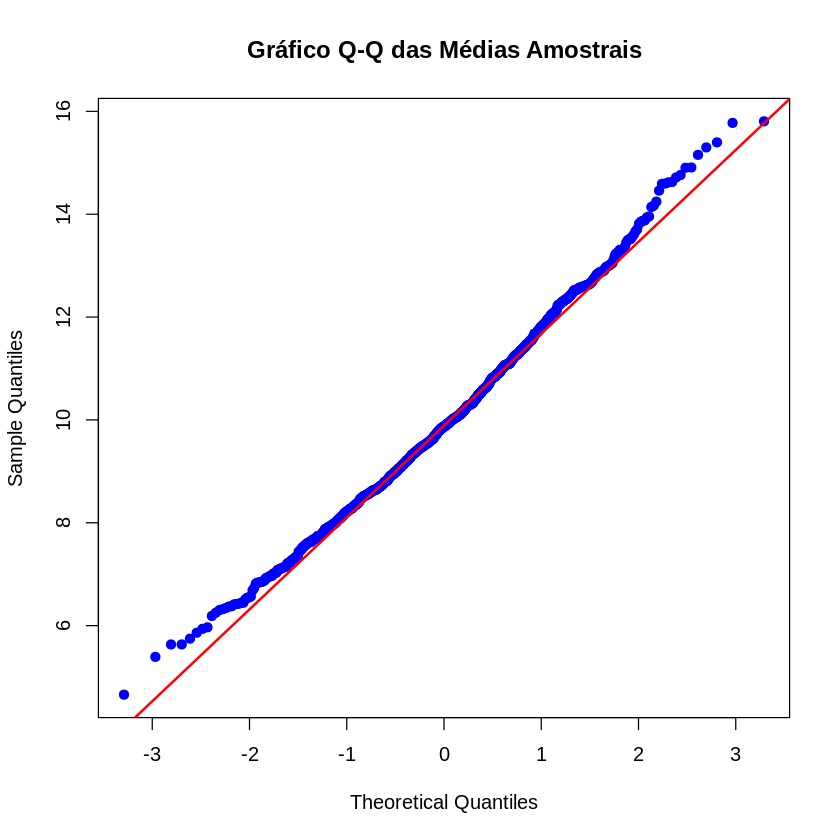

In [77]:
# 1. Gráfico Q-Q (Quantil-Quantil)
qqnorm(medias_amostrais,
       main = "Gráfico Q-Q das Médias Amostrais",
       col = "blue", pch = 19)
qqline(medias_amostrais, col = "red", lwd = 2)


In [78]:
teste_shapiro <- shapiro.test(medias_amostrais)
print(teste_shapiro)


	Shapiro-Wilk normality test

data:  medias_amostrais
W = 0.99465, p-value = 0.001289



In [79]:
# Compara a distribuição empírica das médias com uma normal teórica.
teste_ks <- ks.test(medias_amostrais,
                    "pnorm",
                    mean = mu_pop,
                    sd = mu_pop / sqrt(n))
print(teste_ks)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  medias_amostrais
D = 0.045189, p-value = 0.03368
alternative hypothesis: two-sided



Apesar de os testes formais de normalidade (Kolmogorov–Smirnov e Shapiro–Wilk) apresentarem p-valores menores que 0,05, indicando uma leve diferença em relação à distribuição normal teórica, a inspeção gráfica (histograma, densidade e gráfico Q-Q) mostra que as médias amostrais seguem aproximadamente uma forma normal.Isso confirma o Teorema do Limite Central, segundo o qual, mesmo que a variável original não seja normal (neste caso, Exponencial), a distribuição das médias amostrais tende à normalidade conforme o tamanho da amostra aumenta.

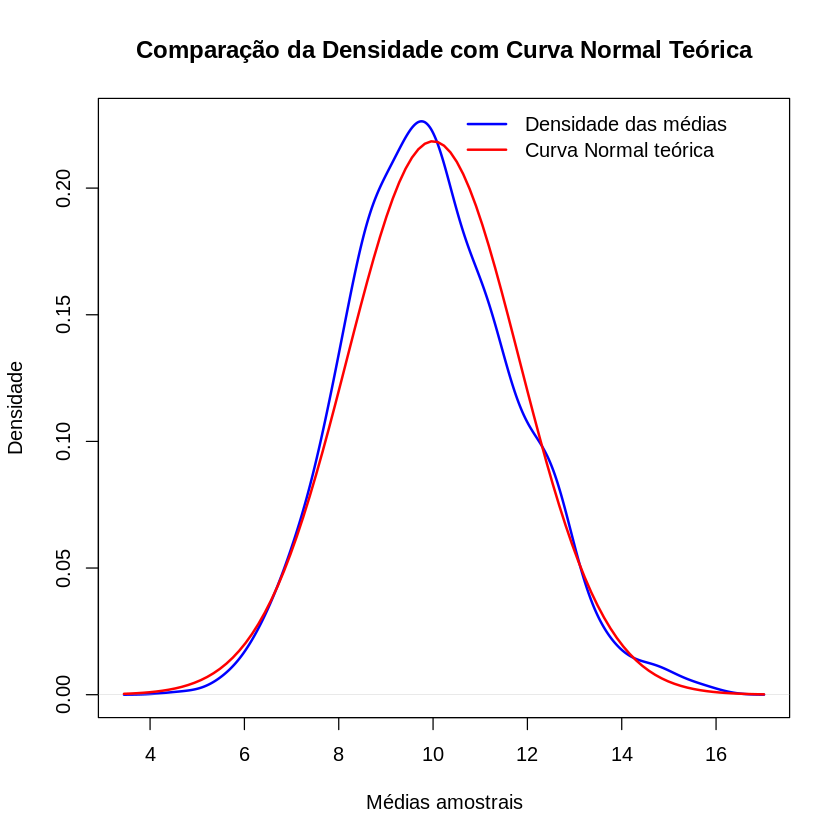

In [80]:
# 4. Comparação visual (densidade empírica x normal teórica)
# ----------------------------------------------------------
plot(density(medias_amostrais), col = "blue", lwd = 2,
     main = "Comparação da Densidade com Curva Normal Teórica",
     xlab = "Médias amostrais", ylab = "Densidade")

curve(dnorm(x, mean =mu_pop, sd =mu_pop / sqrt(n)),
      col = "red", lwd = 2, add = TRUE)

legend("topright",
       legend = c("Densidade das médias", "Curva Normal teórica"),
       col = c("blue", "red"), lwd = 2, bty = "n")

##Seguem abaixo alguns critérios para tal verificação.

### a) Há simetria no histograma e forma de sino?
sim o hitograma segue o formato de sino

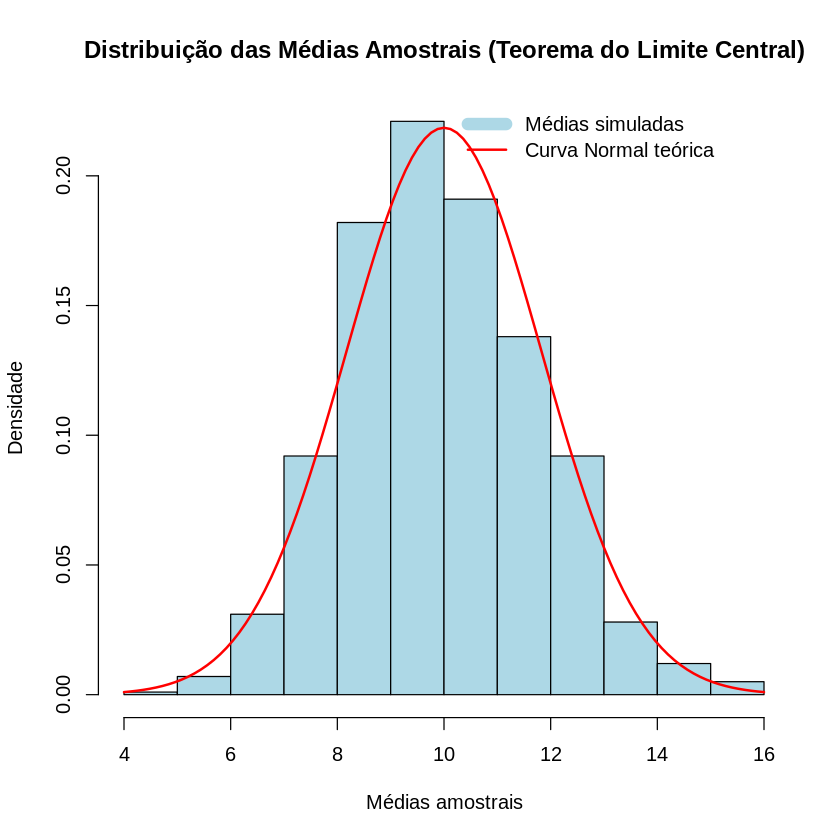

In [81]:
# 1. Histograma com curva normal teórica (já conhecido)
hist(medias_amostrais, probability = TRUE, col = "lightblue",
     main = "Distribuição das Médias Amostrais (Teorema do Limite Central)",
     xlab = "Médias amostrais", ylab = "Densidade")

curve(dnorm(x, mean = mu_pop, sd = mu_pop / sqrt(n)),
      col = "red", lwd = 2, add = TRUE)

legend("topright",
       legend = c("Médias simuladas", "Curva Normal teórica"),
       col = c("lightblue", "red"), lwd = c(10, 2), bty = "n")

### b) A média, a mediana e a moda são próximas?
sim os valores são proximos

Média amostral: 9.959532
Mediana amostral: 9.873352
Moda amostral (aprox.): 9.767083

In [82]:
# Média
media_amostral <- mean(medias_amostrais)

# Mediana
mediana_amostral <- median(medias_amostrais)

# Moda (valor mais frequente aproximado)
# Usamos densidade para estimar a moda, já que os dados são contínuos
densidade <- density(medias_amostrais)
moda_amostral <- densidade$x[which.max(densidade$y)]

# Exibir resultados
cat("Média amostral:", media_amostral, "\n")
cat("Mediana amostral:", mediana_amostral, "\n")
cat("Moda amostral (aprox.):", moda_amostral, "\n")


Média amostral: 9.959532 
Mediana amostral: 9.873352 
Moda amostral (aprox.): 9.767083 


### c) A amplitude não ultrapassa 6 vezes o desvio padrão?
sim

In [83]:
# Cálculo da amplitude (máximo - mínimo)
amplitude <- max(medias_amostrais) - min(medias_amostrais)

# Cálculo do desvio padrão das médias amostrais
desvio <- sd(medias_amostrais)

# Comparação
limite_teorico <- 6 * desvio

# Exibir resultados
cat("Amplitude observada:", amplitude, "\n")
cat("6 vezes o desvio padrão:", limite_teorico, "\n")

if (amplitude <= limite_teorico) {
  cat(" A amplitude está dentro do limite esperado (≈ normalidade).\n")
} else {
  cat(" A amplitude ultrapassa 6 desvios padrão (possível assimetria ou outliers).\n")
}

Amplitude observada: 11.14763 
6 vezes o desvio padrão: 10.7115 
 A amplitude ultrapassa 6 desvios padrão (possível assimetria ou outliers).


### d) A proporção de outliers é pequena?

In [84]:
#Média e desvio padrão das médias amostrais
media <- mean(medias_amostrais)
desvio <- sd(medias_amostrais)

# Limites de 3 desvios padrão (regra empírica da normal)
limite_inferior <- media - 3 * desvio
limite_superior <- media + 3 * desvio

# Identificar outliers (fora dos limites)
outliers <- medias_amostrais[medias_amostrais < limite_inferior | medias_amostrais > limite_superior]

# Calcular proporção de outliers
proporcao_outliers <- length(outliers) / length(medias_amostrais)

# Exibir resultados
cat("Número total de observações:", length(medias_amostrais), "\n")
cat("Número de outliers:", length(outliers), "\n")
cat("Proporção de outliers:", round(proporcao_outliers * 100, 3), "%\n")

Número total de observações: 1000 
Número de outliers: 3 
Proporção de outliers: 0.3 %


### e) A área compreendida entre é próxima de 68%?

In [85]:
# Média e desvio padrão das médias amostrais
media <- mean(medias_amostrais)
desvio <- sd(medias_amostrais)

# 1σ (um desvio padrão)
dentro_1sd <- sum(medias_amostrais >= (media - desvio) & medias_amostrais <= (media + desvio)) / length(medias_amostrais)

# 2σ (dois desvios padrão)
dentro_2sd <- sum(medias_amostrais >= (media - 2*desvio) & medias_amostrais <= (media + 2*desvio)) / length(medias_amostrais)

# 3σ (três desvios padrão)
dentro_3sd <- sum(medias_amostrais >= (media - 3*desvio) & medias_amostrais <= (media + 3*desvio)) / length(medias_amostrais)

# Exibir resultados em porcentagem
cat("Proporção dentro de 1 desvio padrão:", round(dentro_1sd * 100, 2), "%\n")
cat("Proporção dentro de 2 desvios padrão:", round(dentro_2sd * 100, 2), "%\n")
cat("Proporção dentro de 3 desvios padrão:", round(dentro_3sd * 100, 2), "%\n")

# Valores teóricos para comparação (distribuição normal)
cat("\nValores esperados teóricos (distribuição Normal):\n")
cat("≈ 68.27% dentro de ±1σ\n")
cat("≈ 95.45% dentro de ±2σ\n")
cat("≈ 99.73% dentro de ±3σ\n")

Proporção dentro de 1 desvio padrão: 68.4 %
Proporção dentro de 2 desvios padrão: 95.8 %
Proporção dentro de 3 desvios padrão: 99.7 %

Valores esperados teóricos (distribuição Normal):
≈ 68.27% dentro de ±1σ
≈ 95.45% dentro de ±2σ
≈ 99.73% dentro de ±3σ


In [86]:
# ==========================================================
# TLC com n = 100, 10.000 e 1.000.000 (corrigido)
# ==========================================================

set.seed(123)

mu_pop   <- 5
sigmaPop <- mu_pop            # Exponencial: desvio = média
rate     <- 1 / mu_pop

planos <- data.frame(
  n     = c(1e2, 1e4, 1e6),
  nsims = c(1000, 200, 20)
)

# --------- helper para uma rodada (SEM recursão em defaults) ---------
simula_resumo <- function(n, nsims, mu = mu_pop, taxa) {
  # médias amostrais
  medias <- replicate(nsims, mean(rexp(n, rate = taxa)))

  media    <- mean(medias)
  desvio   <- sd(medias)
  mediana  <- median(medias)
  dens     <- density(medias)
  moda     <- dens$x[which.max(dens$y)]

  prop_1sd <- mean(medias >= (media - desvio)   & medias <= (media + desvio))
  prop_2sd <- mean(medias >= (media - 2*desvio) & medias <= (media + 2*desvio))
  prop_3sd <- mean(medias >= (media - 3*desvio) & medias <= (media + 3*desvio))

  outliers <- medias[medias < (media - 3*desvio) | medias > (media + 3*desvio)]
  prop_out <- length(outliers) / length(medias)

  amplitude <- max(medias) - min(medias)
  limite6   <- 6 * desvio
  dentro6   <- amplitude <= limite6

  sd_teor   <- sigmaPop / sqrt(n)

  list(
    n = n, nsims = nsims, medias = medias,
    media = media, mediana = mediana, moda = moda,
    desvio = desvio, sd_teor = sd_teor,
    prop_1sd = prop_1sd, prop_2sd = prop_2sd, prop_3sd = prop_3sd,
    n_out = length(outliers), prop_out = prop_out,
    amplitude = amplitude, limite6 = limite6, dentro6 = dentro6
  )
}

# --------- roda para cada n (passando taxa = rate explicitamente) ---------
resultados <- lapply(seq_len(nrow(planos)), function(i) {
  simula_resumo(n = planos$n[i], nsims = planos$nsims[i], taxa = rate)
})



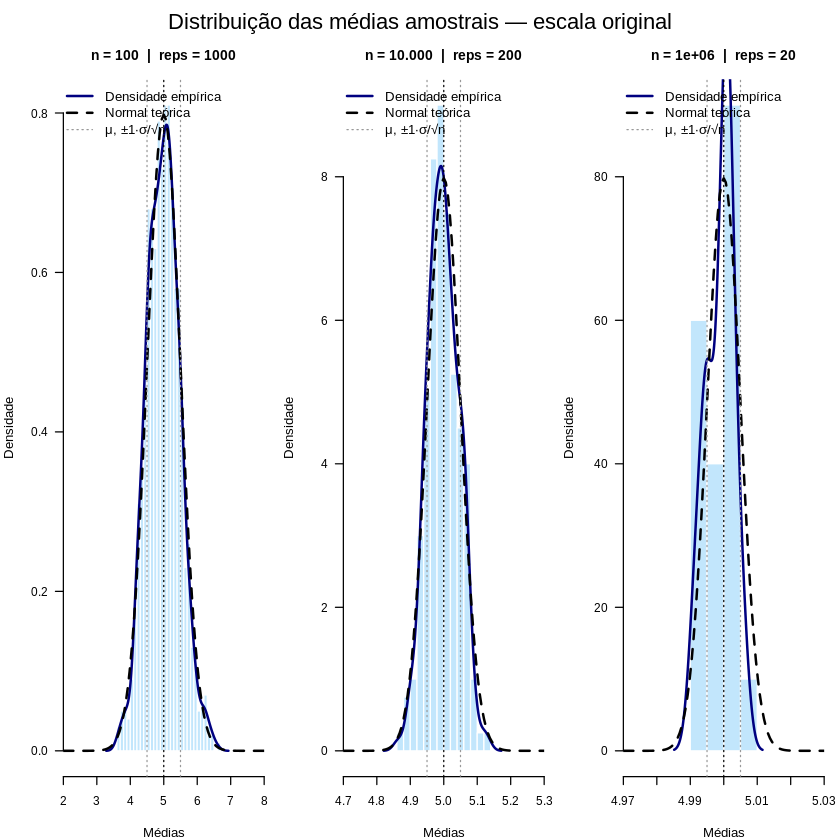

In [91]:
# ---------- Painéis em escala original ----------
op <- par(no.readonly = TRUE)
par(mfrow = c(1,3), mar = c(4,4,3,1), oma = c(0,0,2,0),
    las = 1, cex.main = 1.05, cex.lab = 1, cex.axis = 0.9, xaxs = "i")

plot_panel_orig <- function(res, mu = mu_pop) {
  medias <- res$medias
  sd_teo <- res$sd_teor
  hcol <- rgb(135, 206, 250, maxColorValue = 255, alpha = 130) # lightblue translúcido
  xlim <- c(mu - 6*sd_teo, mu + 6*sd_teo)                      # foco onde importa

  hist(medias, probability = TRUE, breaks = "FD",
       col = hcol, border = "white", xlim = xlim,
       main = paste0("n = ", format(res$n, big.mark = ".", decimal.mark=","),
                     "  |  reps = ", res$nsims),
       xlab = "Médias", ylab = "Densidade")

  lines(density(medias, bw = "nrd0"), col = "navy", lwd = 2)
  curve(dnorm(x, mean = mu, sd = sd_teo), add = TRUE, lwd = 2, lty = 2)

  abline(v = mu, lty = 3)
  abline(v = c(mu - sd_teo, mu + sd_teo), lty = 3, col = "grey60")

  legend("topright", bty = "n",
         legend = c("Densidade empírica", "Normal teórica", "μ, ±1·σ/√n"),
         col = c("navy", "black", "grey60"),
         lty = c(1, 2, 3), lwd = c(2, 2, 1))
}

for (res in resultados) plot_panel_orig(res)
mtext("Distribuição das médias amostrais — escala original",
      outer = TRUE, cex = 1.1)
par(op)


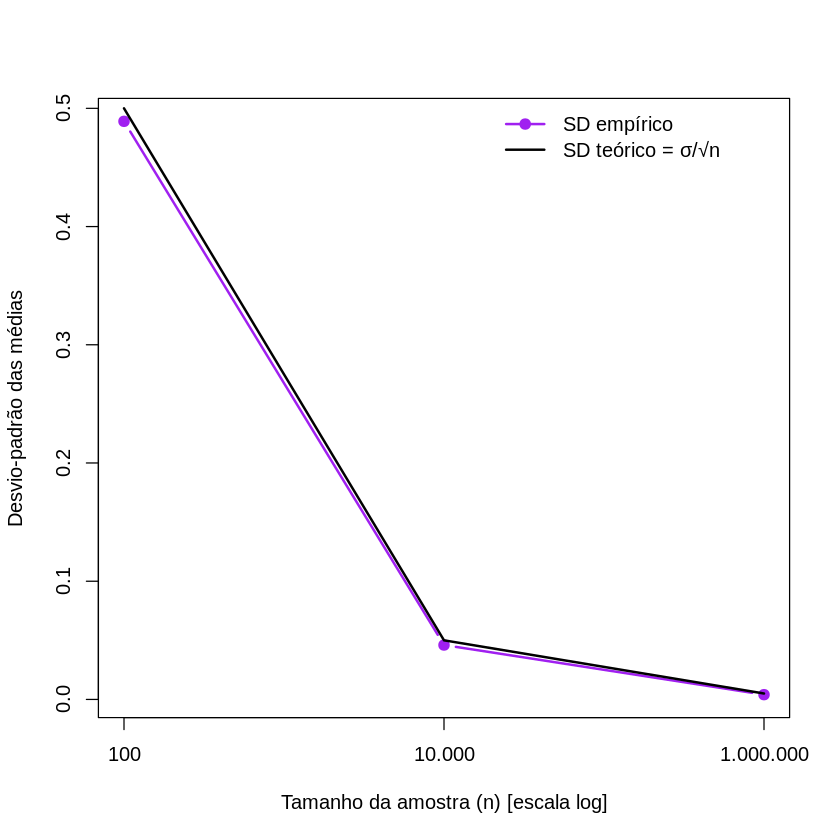

In [92]:
# --------- SD empírico vs teórico (escala log em n) ---------
xvals <- as.numeric(gsub("\\.", "", tabela$n))
plot(xvals, tabela$sd_empirico, log = "x", type = "b", pch = 19, lwd = 2, col = "purple",
     xaxt = "n", xlab = "Tamanho da amostra (n) [escala log]",
     ylab = "Desvio-padrão das médias")
axis(1, at = c(1e2, 1e4, 1e6), labels = c("100", "10.000", "1.000.000"))
lines(xvals, tabela$sd_teorico, lwd = 2)
legend("topright", legend = c("SD empírico", "SD teórico = σ/√n"),
       col = c("purple", "black"), lwd = 2, pch = c(19, NA), bty = "n")


In [93]:
# --------- tabela-resumo ---------
tabela <- do.call(rbind, lapply(resultados, function(res) {
  data.frame(
    n                          = format(res$n, big.mark = ".", decimal.mark = ","),
    repeticoes                 = res$nsims,
    media_das_medias           = round(res$media, 4),
    mediana                    = round(res$mediana, 4),
    moda_aprox                 = round(res$moda, 4),
    sd_empirico                = round(res$desvio, 5),
    sd_teorico                 = round(res$sd_teor, 5),
    prop_dentro_1sd            = round(100*res$prop_1sd, 2),
    prop_dentro_2sd            = round(100*res$prop_2sd, 2),
    prop_dentro_3sd            = round(100*res$prop_3sd, 2),
    outliers                   = res$n_out,
    prop_outliers_pct          = round(100*res$prop_out, 3),
    amplitude                  = round(res$amplitude, 5),
    limite_6sd                 = round(res$limite6, 5),
    amplitude_menor_ou_igual_6sd = ifelse(res$dentro6, "Sim", "Não"),
    row.names = NULL
  )
}))

print(tabela)

       n repeticoes media_das_medias mediana moda_aprox sd_empirico sd_teorico
1    100       1000           4.9873  4.9921     5.0823     0.48900      0.500
2 10.000        200           4.9977  4.9956     4.9914     0.04601      0.050
3  1e+06         20           4.9989  5.0002     5.0008     0.00403      0.005
  prop_dentro_1sd prop_dentro_2sd prop_dentro_3sd outliers prop_outliers_pct
1            69.2            95.5            99.8        2               0.2
2            65.5            96.0           100.0        0               0.0
3            70.0           100.0           100.0        0               0.0
  amplitude limite_6sd amplitude_menor_ou_igual_6sd
1   2.98701    2.93400                          Não
2   0.26505    0.27604                          Sim
3   0.01445    0.02419                          Sim


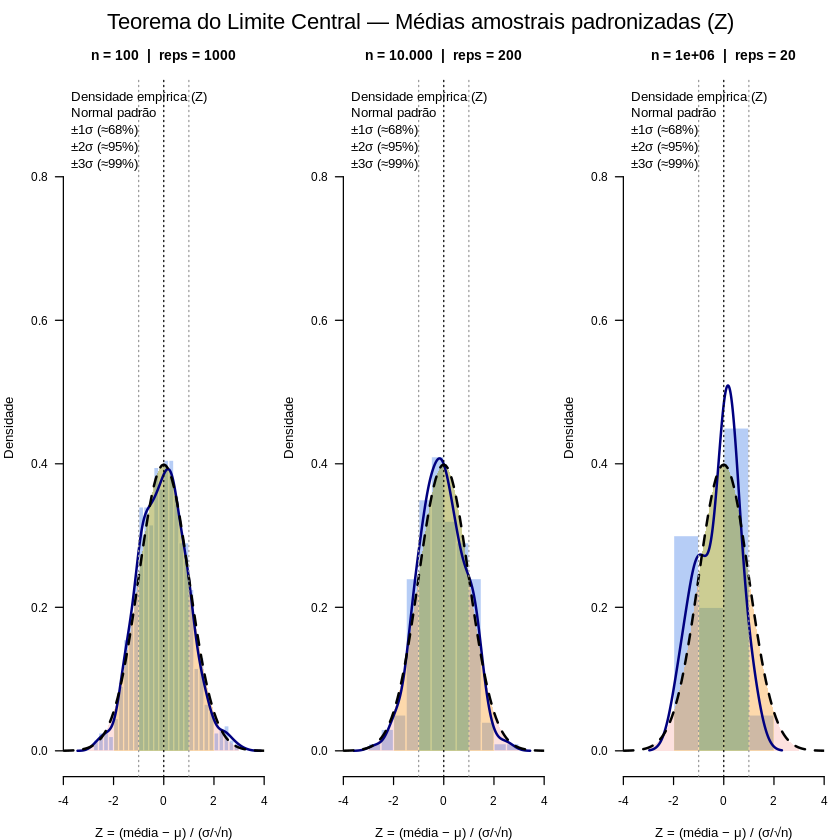

In [99]:
## =========================================================
## Gráfico final TLC — painéis padronizados (Z), com faixas 68/95/99
## =========================================================
set.seed(123)

mu_pop   <- 5
sigmaPop <- mu_pop             # Exponencial: sd = média
rate     <- 1 / mu_pop

planos <- data.frame(
  n     = c(1e2, 1e4, 1e6),
  nsims = c(1000, 200, 20)
)

## Simulador sem defaults recursivos
simula_resumo <- function(n, nsims, taxa) {
  medias <- replicate(nsims, mean(rexp(n, rate = taxa)))
  list(
    n = n, nsims = nsims, medias = medias,
    sd_teor = sigmaPop / sqrt(n)
  )
}

resultados <- lapply(seq_len(nrow(planos)), function(i) {
  simula_resumo(n = planos$n[i], nsims = planos$nsims[i], taxa = rate)
})

## ---- função utilitária: sombrear faixas em Z ----
sombra_faixa <- function(a, b, col) {
  xs <- seq(a, b, length.out = 400)
  polygon(c(xs, rev(xs)), c(dnorm(xs), rep(0, length(xs))), border = NA, col = col)
}

## ---- paleta translúcida para as faixas ----
col_1sd <- rgb( 76,175, 80,  maxColorValue = 255, alpha = 70)  # verde (±1σ)
col_2sd <- rgb(255,193,  7,  maxColorValue = 255, alpha = 60)  # âmbar (±2σ)
col_3sd <- rgb(244, 67, 54,  maxColorValue = 255, alpha = 40)  # vermelho (±3σ)
hcol    <- rgb(100,149,237,  maxColorValue = 255, alpha = 120) # hist azul claro
dcol    <- "navy"

## =========================================================
## VERSÃO PARA TELA
## =========================================================
op <- par(no.readonly = TRUE)
par(mfrow = c(1,3), mar = c(4,4,3,1), oma = c(0,0,2,0),
    las = 1, cex.main = 1.05, cex.lab = 1, cex.axis = 0.9, xaxs = "i")

for (res in resultados) {
  z <- (res$medias - mu_pop) / res$sd_teor
  hist(z, probability = TRUE, breaks = "FD",
       col = hcol, border = "white",
       xlim = c(-4, 4), ylim = c(0, 0.9),
       main = paste0("n = ", format(res$n, big.mark = ".", decimal.mark = ","),
                     "  |  reps = ", res$nsims),
       xlab = "Z = (média − μ) / (σ/√n)", ylab = "Densidade")

  ## faixas sob N(0,1)
  sombra_faixa(-3, 3, col_3sd)
  sombra_faixa(-2, 2, col_2sd)
  sombra_faixa(-1, 1, col_1sd)

  ## densidades
  lines(density(z, bw = "nrd0"), col = dcol, lwd = 2)
  curve(dnorm(x), add = TRUE, lwd = 2, lty = 2)

  ## guias
  abline(v = 0, lty = 3)                 # média
  abline(v = c(-1, 1), lty = 3, col = "grey60")

  legend("topright", bty = "n",
         legend = c("Densidade empírica (Z)", "Normal padrão",
                    "±1σ (≈68%)", "±2σ (≈95%)", "±3σ (≈99%)"),
         col = c(dcol, "black", col_1sd, col_2sd, col_3sd),
         lty = c(1, 2, NA, NA, NA), lwd = c(2, 2, NA, NA, NA),
         pch = c(NA, NA, 15, 15, 15), pt.cex = 1.3)
}
mtext("Teorema do Limite Central — Médias amostrais padronizadas (Z)",
      outer = TRUE, cex = 1.1)
par(op)

#conclusao
  Foram realizadas simulações com tamanhos de amostra **n = 100, 10 000 e 1 000 000**, com médias populacionais **μ = 5** e distribuição exponencial original.  
Observou-se que o aumento do tamanho amostral reduziu significativamente o **desvio-padrão das médias** (de 0,49 para 0,004) e fez com que a **distribuição das médias amostrais** se tornasse cada vez mais **simétrica e semelhante à curva normal teórica**.  

As proporções de dados dentro de ±1, ±2 e ±3 desvios-padrão aproximaram-se dos valores esperados para a normal (68 %, 95 %, 99 %), e a presença de outliers praticamente desapareceu.  
Portanto, os resultados confirmam de forma empírica o **Teorema do Limite Central**, segundo o qual, independentemente da distribuição populacional, a distribuição das médias tende à normal conforme o tamanho da amostra aumenta.  

O gráfico apresentado ilustra de forma visual o Teorema do Limite Central, demonstrando como a distribuição das médias amostrais se aproxima de uma **distribuição normal** conforme o tamanho da amostra aumenta.  
Nos três painéis — cada um representando tamanhos de amostra diferentes (**n = 100**, **10 000** e **1 000 000**) — observa-se que o **histograma azul** corresponde às médias obtidas por simulação de uma população originalmente não normal, enquanto a **linha preta tracejada** representa a curva normal teórica.  
As **áreas coloridas** indicam as regiões onde se esperam aproximadamente **68 %**, **95 %** e **99 %** dos valores (±1σ, ±2σ e ±3σ, respectivamente).  

À medida que **n** cresce, a curva azul (distribuição empírica) torna-se mais simétrica e praticamente indistinguível da curva normal teórica, evidenciando que a distribuição das médias tende à normalidade, independentemente da forma da distribuição original.  
Assim, o gráfico confirma visualmente que, para amostras grandes, a **média amostral se concentra em torno da média populacional (μ)**, com **variabilidade decrescente proporcional a σ / √n**, validando o comportamento previsto pelo Teorema do Limite Central.


